In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans, DBSCAN

df = pd.read_excel('russia_crime.xlsx')
df.head(10)

,Территория,Зарегистрировано,Раскрыто всего,Раскрываемость %,Не раскрыто,ФО
0,Белгородская область,16099,9237,"62,1",5636,Центральный ФО
1,Брянская область,14082,9759,"71,5",3893,Центральный ФО
2,Владимирская область,15986,7873,"50,4",7736,Центральный ФО
3,Воронежская область,28302,12440,"43,8",15944,Центральный ФО
4,Ивановская область,11794,6862,"59,1",4755,Центральный ФО
5,Калужская область,13295,6674,"50,4",6581,Центральный ФО
6,Костромская область,8559,4193,"52,1",3848,Центральный ФО
7,Курская область,12936,7290,"57,4",5417,Центральный ФО
8,Липецкая область,14184,6989,"49,4",7146,Центральный ФО
9,г. Москва,133985,46280,"34,4",88434,Центральный ФО


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Территория        86 non-null     object
 1   Зарегистрировано  86 non-null     int64 
 2   Раскрыто всего    86 non-null     int64 
 3   Раскрываемость %  86 non-null     object
 4   Не раскрыто       86 non-null     int64 
 5   ФО                86 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.2+ KB


In [23]:

df2 = df.iloc[:, 1:-1]


In [30]:
df2['Раскрываемость %'] = df2['Раскрываемость %'].str.replace(',', '.').astype(float)


In [31]:
df2['Раскрываемость %'] = df2['Раскрываемость %'].map(lambda x: round(x))

In [32]:
df2

,Зарегистрировано,Раскрыто всего,Раскрываемость %,Не раскрыто
0,16099,9237,62,5636
1,14082,9759,72,3893
2,15986,7873,50,7736
3,28302,12440,44,15944
4,11794,6862,59,4755
...,...,...,...,...
81,2725,1537,55,1252
82,18441,11287,62,6874
83,18932,9210,48,9828
84,917,496,62,303


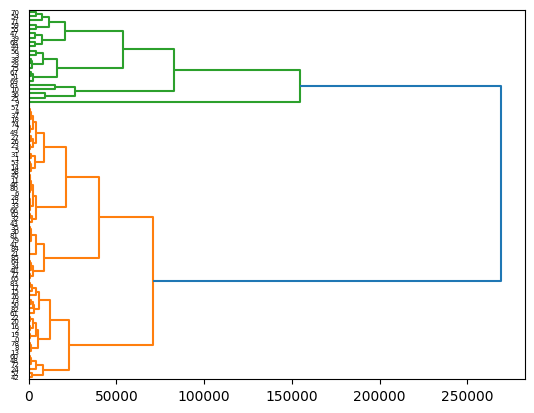

In [33]:
link = linkage(df2, 'ward', 'euclidean')
dn = dendrogram(link, orientation = "right")

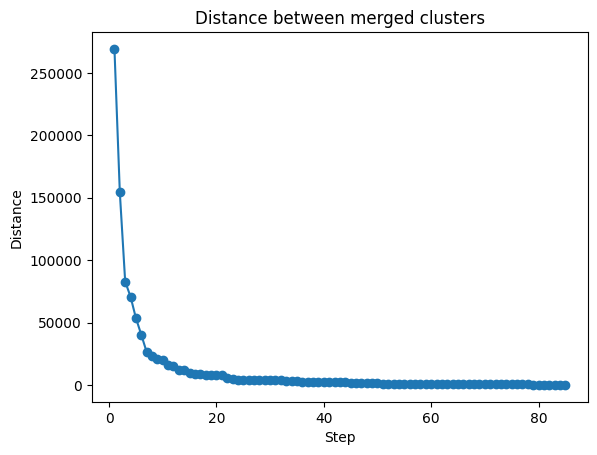

In [34]:
# каменистая осыпь
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

plt.title('Distance between merged clusters')
plt.plot(idxs, dist_rev, marker='o')
plt.xlabel('Step')
plt.ylabel('Distance')